In [1]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img
#create an image instance of the ImageDataGenerator
train_datagen=ImageDataGenerator(rotation_range=40,
                                 width_shift_range=0.25,
                                height_shift_range=0.25,
                                shear_range=0.2,
                                zoom_range=0.2,
                                rescale=1./255,
                                horizontal_flip=True,
                                fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)

#Train data fetching from the directory of images
batch_size=16
train_data=train_datagen.flow_from_directory('C:/Users/vamsi/Jupiternotebook/AI Solution Development/NN/Results/CNN/train',
                                             target_size=(150,150),batch_size=batch_size,class_mode='categorical')

#Test data fetching from the directory of images
test_data=test_datagen.flow_from_directory('C:/Users/vamsi/Jupiternotebook/AI Solution Development/NN/Results/CNN/test',
                                           target_size=(150,150),batch_size=batch_size,class_mode='categorical')

Found 2023 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [9]:
model=Sequential()

#1st convolution layer
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd convolution layer
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

#converting multi dimension to 1 d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))

#output layer
num_classes = len(train_data.class_indices)

model.add(Dense(units=num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 32)       

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
result=model.fit(train_data,
                 steps_per_epoch=48//batch_size,epochs=50,
                 validation_data=test_data,
                 validation_steps=48//batch_size)

Epoch 1/50
3/3 [==============================] - 2s 352ms/step - loss: 0.8246 - accuracy: 0.5417 - val_loss: 0.7817 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 1s 303ms/step - loss: 0.7704 - accuracy: 0.4167 - val_loss: 0.7101 - val_accuracy: 0.5417
Epoch 3/50
3/3 [==============================] - 1s 266ms/step - loss: 1.1243 - accuracy: 0.4583 - val_loss: 0.7000 - val_accuracy: 0.4167
Epoch 4/50
3/3 [==============================] - 1s 271ms/step - loss: 0.7627 - accuracy: 0.4375 - val_loss: 0.7220 - val_accuracy: 0.4792
Epoch 5/50
3/3 [==============================] - 1s 270ms/step - loss: 0.7130 - accuracy: 0.4167 - val_loss: 0.6934 - val_accuracy: 0.4375
Epoch 6/50
3/3 [==============================] - 1s 267ms/step - loss: 0.8170 - accuracy: 0.4167 - val_loss: 0.6967 - val_accuracy: 0.4792
Epoch 7/50
3/3 [==============================] - 1s 265ms/step - loss: 0.7525 - accuracy: 0.4375 - val_loss: 0.7139 - val_accuracy: 0.5208
Epoch 8/50
3/3 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


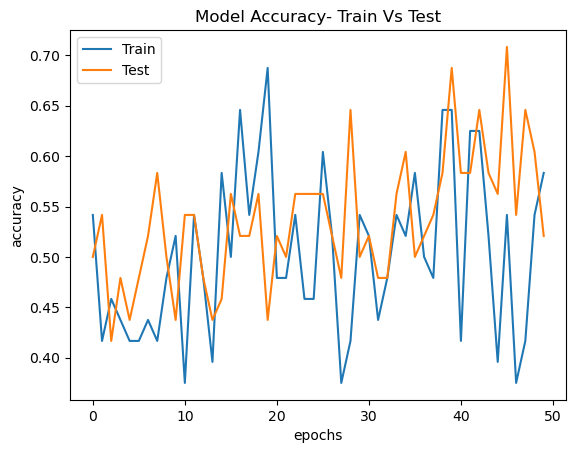

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()



# Plot for Train & Test Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


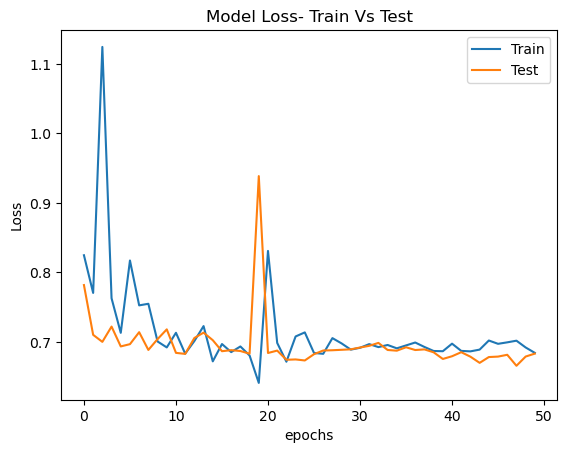

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

